In [1]:
from importlib import reload
import sys
import os
sys.path.insert(0, './../scripts')

In [74]:
import numpy as np
from numpy.linalg import solve
import matplotlib.pyplot as plt

import rpl as rpl
import sim_fun as sfun
import sim_util as sutil

In [19]:
with_vip = False

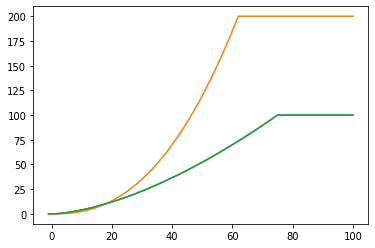

In [37]:
reload(rpl)

if with_vip:
    rp = rpl.RPL([0.1, 0.01,0.1, 0.1 ],
                 [1.6, 2.4, 1.6, 1.6 ],
                 [100, 200, 100, 100 ],
                 [0.03,0.01,0.03,0.03])
else:
    rp = rpl.RPL([0.1, 0.01,0.1 ],
                 [1.6, 2.4, 1.6 ],
                 [100, 200, 100 ],
                 [0.03,0.01,0.03])

xs = np.linspace(-1,100,1000)
plt.plot(xs,rp.phi_tens(xs).T)

[[-3.0265833  -3.02603822 15.5       ]
 [ 1.32767874  1.62668342 16.59738728]
 [ 4.33769418  6.05842133 19.93148958]
 [ 6.70449628  9.72622713 23.04823238]
 [ 8.74278    12.85717467 25.74613364]
 [10.58515557 15.63335827 28.09926431]
 [12.29104794 18.12424925 30.1773631 ]
 [13.89846982 20.4038937  32.03605824]
 [15.43469728 22.53901676 33.71869328]
 [16.90475058 24.50739145 35.24813658]
 [18.33510724 26.41250596 36.65870603]
 [19.71750257 28.18980593 37.95643429]
 [21.06590329 29.89367523 39.16156091]
 [22.38196078 31.52019448 40.28341671]
 [23.66826596 33.07319327 41.33065988]
 [24.9315838  34.5783297  42.31411135]
 [26.18307013 36.08309134 43.24758867]
 [27.39959546 37.47237353 44.11664462]
 [28.60010938 38.83299134 44.93989518]
 [29.78232165 40.15085821 45.71862597]]
[[0.00000000e+00 0.00000000e+00 8.02658330e+00]
 [1.57379732e-01 3.21460262e-02 8.95495823e+00]
 [1.04619897e+00 7.54506064e-01 1.20022760e+01]
 [2.09983827e+00 2.34999305e+00 1.51432886e+01]
 [3.21099242e+00 4.59144415

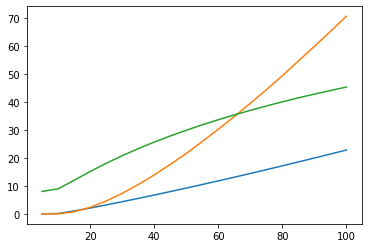

In [95]:
reload(sfun)

cs = np.linspace(5,100,(100-5)//5+1)

if with_vip:
    bs = np.array([0.0,0.0,15.0,0.0])
    gs = np.array([1.0,1.0,0.1,0.0])
    W = np.array([[ 2.0,-1.0,-1.0, 0.0],
                  [ 4.0,-1.5,-1.0, 0.0],
                  [ 4.0,-1.0, 0.0,-2.0],
                  [ 2.0, 0.0,-1.0, 0.0]])
else:
    bs = np.array([0.0,0.0,15.0])
    gs = np.array([1.0,1.0,0.1])
    W = np.array([[ 2.0,-1.0,-1.0],
                  [ 4.0,-1.5,-1.0],
                  [ 4.0,-1.0, 0.0]])

hs = gs*cs[:,np.newaxis] + bs

vs,rs,_, = sfun.sim_rates_mult(rp,np.arange(0,10,rp.taus[1]/3),W,hs)

print(vs)
print(rs)

plt.plot(cs,rs)

[[0.01058082 0.00067266 0.00011518 ... 0.00383794 0.00412674 0.00441331]
 [0.01074361 0.00113401 0.00051682 ... 0.00619444 0.00665525 0.00711407]
 [0.01100462 0.00187599 0.00125443 ... 0.00934834 0.01001983 0.01069021]
 ...
 [0.00095604 0.00208061 0.00335161 ... 0.00920877 0.00928266 0.00935519]
 [0.00091651 0.00199146 0.00320446 ... 0.00892309 0.00899608 0.00906737]
 [0.00087891 0.00190685 0.00306495 ... 0.00864731 0.00871948 0.00878962]]


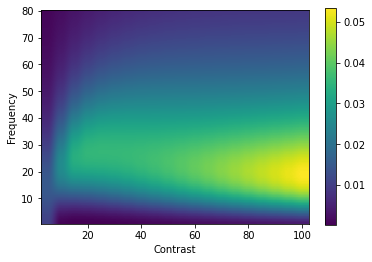

In [112]:
reload(sfun)

Wlfp = np.vstack((np.hstack((W[:,0:1]/2,np.zeros((rp.n_types,rp.n_types-1)))),
                  np.hstack((W[:,0:1]/2,np.zeros((rp.n_types,rp.n_types-1)))),
                  np.hstack((np.zeros((rp.n_types,1)),W[:,1:]))))
syn_taus = np.array([0.005,0.100,0.007])
corr_tau = 0.005

fs = np.linspace(1,80,(80-1)//1+1)
As = sfun.calc_lfp_mult(rp,Wlfp,hs,syn_taus,corr_tau,vs,fs)

print(As)

plt.imshow(As,origin='lower',extent=((cs[0]-(cs[1]-cs[0])/2,cs[-1]+(cs[1]-cs[0])/2,
                                      fs[0]-(fs[1]-fs[0])/2,fs[-1]+(fs[1]-fs[0])/2)))
plt.xlabel('Contrast')
plt.ylabel('Frequency')
plt.colorbar()

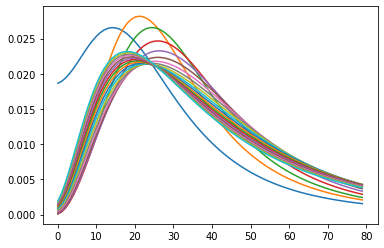

In [113]:
plt.plot(As/np.sum(As,axis=0))

In [88]:
reload(sutil)

param_dict = sutil.gen_rand_param(0)
print(param_dict)
print()
print(np.array(list(param_dict.values())))
print()
print(len(np.array(list(param_dict.values()))))

{'seed': 0, 'gE': 8.826134712444464, 'gP': 17.193025856300824, 'gS': 4.861830670965986, 'bS': 26.19990446555136, 'WEE': 13.614588098911058, 'WEP': 15.53686930229308, 'WES': 28.061822799686052, 'WPE': 49.95011074371826, 'WPP': 30.840842059982833, 'WPS': 6.196720149329865, 'WSE': 50.69122993348227, 'WSP': 8.50942922407118}

[ 0.          8.82613471 17.19302586  4.86183067 26.19990447 13.6145881
 15.5368693  28.0618228  49.95011074 30.84084206  6.19672015 50.69122993
  8.50942922]

13


In [90]:
%run ./../scripts/sim.py -j 0

Saving all results in sim_results-0.txt
 
-------------------Computing and saving network response for rep    0 out of 1000-------------------
Parameters used seed = 0 // gE = 8.83 // gP = 17.19 // gS = 4.86 // bS = 26.20
                                WEE = 13.61 // WEP = 15.54 // WES = 28.06 // WPE = 15.54
                                WPP = 30.84 // WPS = 6.20 // WSE = 50.69 // WSP = 8.51



/Users/tuannguyen/MD_SOM_Gamma/scripts/sim.py:48: UserWarning: loadtxt: Empty input file: "./../results/sim_results-0.txt"
  first_rep = this_loaded_results.shape[0]


[[-1358.96046642  -223.84109767    50.50905782]
 [-1314.82979286  -137.88192606    74.81821118]
 [-1270.6991193    -51.93175975    99.12736453]
 [-1240.43473446     6.50418944   115.84205338]
 [-1237.08822376    11.51138542   117.81402023]
 [-1234.71812847    14.5806068    119.25121152]
 [-1232.69688069    16.96126742   120.4973416 ]
 [-1230.86931837    18.95844391   121.63739157]
 [-1229.17061189    20.692025     122.70686815]
 [-1227.56286571    22.24533251   123.72652644]
 [-1226.027178      23.64428769   124.70671884]
 [-1224.53815437    24.98315955   125.66135365]
 [-1223.10079121    26.19195273   126.58769441]
 [-1221.70393455    27.30758227   127.49185006]
 [-1220.3234096     28.45280525   128.38706095]
 [-1218.98455545    29.45863528   129.25944905]
 [-1217.66739782    30.43056065   130.11995412]
 [-1216.3675574     31.38383711   130.97097469]
 [-1215.09022308    32.27801464   131.80966882]
 [-1213.82897839    33.14413261   132.63955079]]

[[ 0.          0.         50.        ]

/Users/tuannguyen/MD_SOM_Gamma/scripts/sim.py:113: UserWarning: loadtxt: Empty input file: "./../results/sim_results-0.txt"
  except:


-------------------Computing and saving network response for rep    1 out of 1000-------------------
Parameters used seed = 1 // gE = 6.73 // gP = 17.32 // gS = 0.10 // bS = 14.58
                                WEE = 4.78 // WEP = 2.31 // WES = 12.00 // WPE = 2.31
                                WPP = 12.76 // WPS = 8.67 // WSE = 26.89 // WSP = 10.99

[[  17.60347457   23.56578993   -6.66955047]
 [  26.16845524   31.29866571  -55.13266819]
 [-229.022006     11.36560081   27.66262152]
 [  25.97055463   35.16320607 -188.42194614]
 [ -74.44483485   28.74158251 -154.03199602]
 [  13.00318296   33.71690465 -199.38428882]
 [ 104.80634183  214.83163487    6.9874768 ]
 [  71.65792927  165.17080643   21.08162029]
 [  87.18023514  256.45601152   39.7268268 ]
 [  37.03472016  226.70317096   80.49651273]
 [  18.44131085  196.85988007   65.53449645]
 [  56.19170204  382.30243218  109.14005545]
 [  27.7736548   368.78530345   99.48613431]
 [ 147.95766643  619.20034754    9.26946413]
 [ 161.97865784

[[-3046.81801081  -284.66907649    73.26071832]
 [-2969.43913861  -218.73667721   112.18175053]
 [-2892.06026641  -152.95372237   151.10278275]
 [-2814.6813942    -87.06907785   190.02381497]
 [-2737.302522     -21.15990764   228.94484719]
 [-2680.91739514    12.12929812   254.93278839]
 [-2641.7745236     18.68643517   270.29872509]
 [-2603.99159446    23.13828382   284.82687613]
 [-2566.79974675    26.65620664   298.99089443]
 [-2529.94803269    29.65873568   312.94537511]
 [-2493.32614908    32.31063498   326.7582699 ]
 [-2456.87981535    34.6694163    340.46301807]
 [-2420.5599442     36.84378108   354.08985961]
 [-2384.34319598    38.86076817   367.65317279]
 [-2348.21286317    40.74039731   381.16325019]
 [-2312.1542865     42.50850394   394.62912257]
 [-2276.15736583    44.17967067   408.0570121 ]
 [-2240.21266338    45.7725699    421.45273285]
 [-2180.45220562    84.29623408   449.52002964]
 [-2103.07333342   150.10507539   488.44106185]]

[[  0.           0.          50.      

KeyboardInterrupt: 